<a href="https://colab.research.google.com/github/madjidsadou/freecodescamp/blob/main/CNN_dog_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow[and-cuda]

try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale= 1./255)
validation_image_generator = ImageDataGenerator(rescale= 1./255)
test_image_generator = ImageDataGenerator(rescale= 1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,class_mode='binary' )
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,class_mode='binary' )
test_data_gen = test_image_generator.flow_from_directory(PATH,target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size, classes =['test'], shuffle = False )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


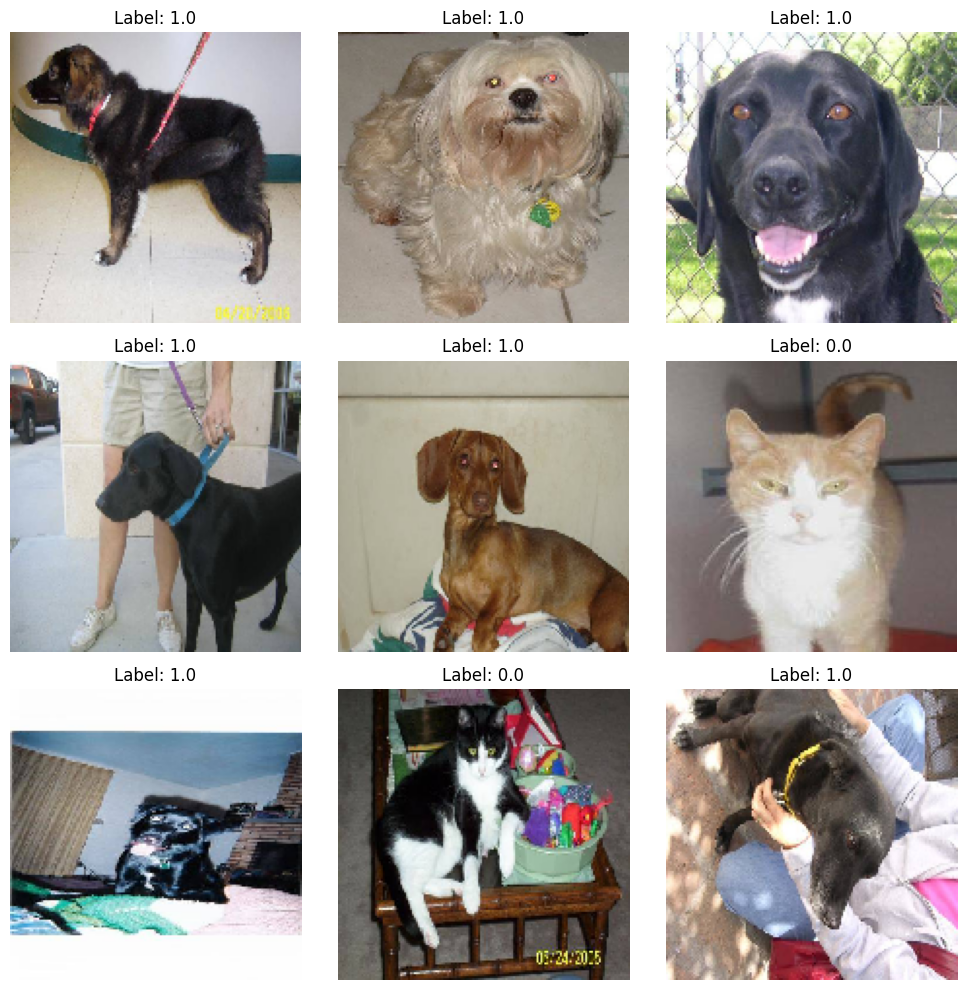

In [ ]:
def plot_images_from_iterator(data_gen, num_images=9):
    # Get one batch of images and labels
    images, labels = next(data_gen)  # Get the next batch of images and labels

    # Create a 3x3 grid for displaying images (adjust num_images for different grid sizes)
    num_rows = 3
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()  # Flatten the grid so we can easily index the axes

    # Plot images
    for i in range(num_images):
        image = images[i]  # Get the image
        label = labels[i]  # Get the corresponding label

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Hide the axes for cleaner display
        axes[i].set_title(f"Label: {label}", fontsize=12)  # Set the label as title

    plt.tight_layout()  # Adjust layout for a better fit
    plt.show()

# Call the function to plot images from your DirectoryIterator
plot_images_from_iterator(train_data_gen)


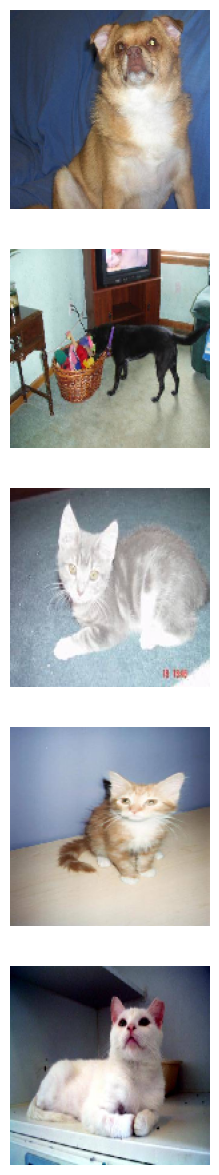

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(rescale= 1./255,rotation_range=45,width_shift_range=.15,height_shift_range=.15,horizontal_flip=True,zoom_range=0.5)


Found 2000 images belonging to 2 classes.


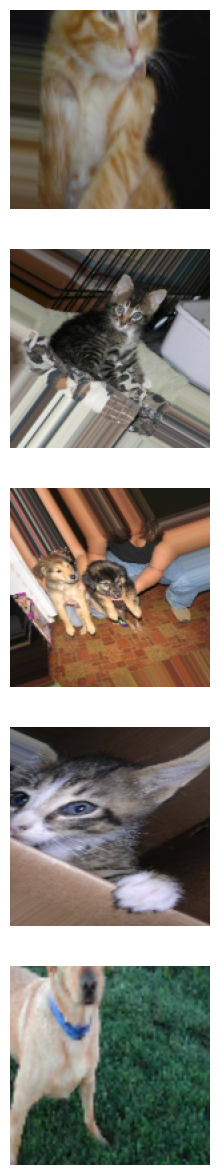

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
print(train_data_gen.class_indices)
print(val_data_gen.class_indices)
print(test_data_gen.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}
{'test': 0}


In [ ]:
# 7
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 294,081 (1.12 MB)

 Trainable params: 294,081 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data_gen, epochs=epochs, validation_data=val_data_gen)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5171 - loss: 0.6964 - val_accuracy: 0.5570 - val_loss: 0.6928
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 612ms/step - accuracy: 0.5229 - loss: 0.6922 - val_accuracy: 0.5160 - val_loss: 0.6918
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 611ms/step - accuracy: 0.5353 - loss: 0.6892 - val_accuracy: 0.5610 - val_loss: 0.6773
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 619ms/step - accuracy: 0.5717 - loss: 0.6741 - val_accuracy: 0.5730 - val_loss: 0.6863
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 590ms/step - accuracy: 0.5816 - loss: 0.6778 - val_accuracy: 0.6030 - val_loss: 0.6637
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 684ms/step - accuracy: 0.6145 - loss: 0.6639 - val_accuracy: 0.6130 - val_loss: 0.6615
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 592ms/step - accuracy: 0.5776 - loss: 0.6718 - val_accuracy: 0.6430 - val_loss: 0.6597
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 618ms/step - accuracy: 0.6494 - loss: 0.6433 - val_accuracy: 0.6600 -

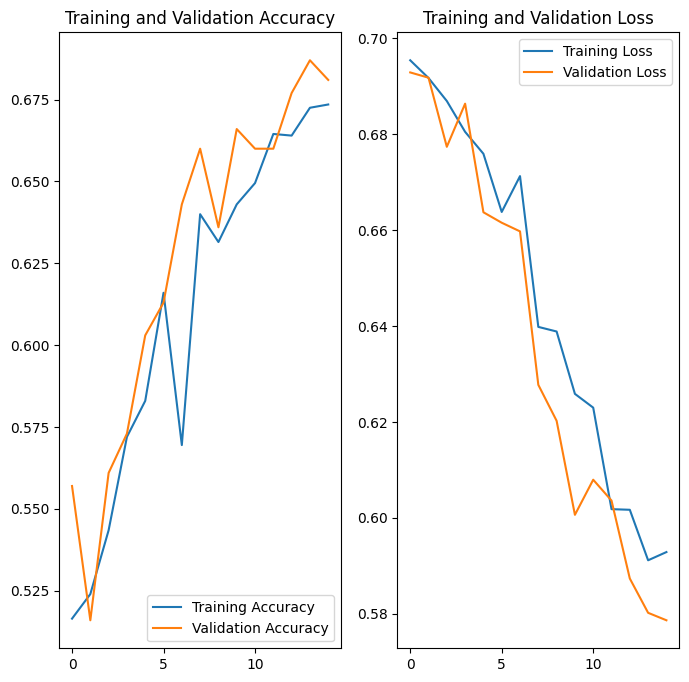

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)
probabilities = np.ravel(probabilities)
print(probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0.61406165 0.32892647 0.11104343 0.5998546  0.60353583 0.45837626
 0.56689024 0.2618406  0.29412612 0.9667954  0.18334681 0.5420631
 0.2739377  0.42970124 0.39940464 0.7761477  0.7133857  0.960515
 0.44662753 0.6020205  0.2426938  0.39516646 0.33431703 0.5524235
 0.32238188 0.21205457 0.12294229 0.27342886 0.24766834 0.45059204
 0.32920668 0.19697987 0.7026353  0.99992275 0.23970476 0.69651014
 0.9979418  0.5316378  0.23548561 0.48461422 0.4833668  0.2995281
 0.6808533  0.54260224 0.18157768 0.28243554 0.5281506  0.20767191
 0.3860409  0.22616741]


In [ ]:
import numpy as np
batch_index = 0
data_list = []

while batch_index <= test_data_gen.batch_index:
    data = next(test_data_gen)
    data_list.append(data[0])
    batch_index = batch_index + 1

# now, data_array is the numeric data of whole images
data_array = np.asarray(data_list)
data_array = np.vstack(data_array)
data_array.shape

(50, 150, 150, 3)

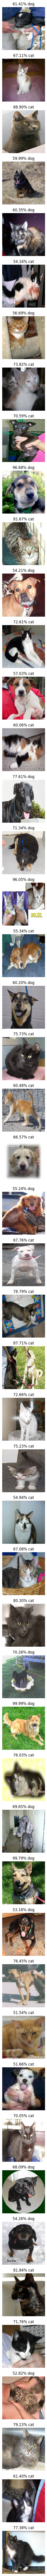

In [ ]:
plotImages(data_array,probabilities)

In [ ]:
import numpy as np
batch_index = 0
data_list = []

while batch_index <= train_data_gen.batch_index:
    data1 = next(train_data_gen)
    data_list.append(data[0])
    batch_index = batch_index + 1

# now, data_array is the numeric data of whole images
data_array = np.asarray(data_list)
data_array = np.vstack(data_array)
data_array.shape

(800, 150, 150, 3)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
